### Load and Display Device Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
device_df = pd.read_csv('/kaggle/input/device/device.csv')

# Display basic information
device_df.info()
device_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551828 entries, 0 to 1551827
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1551828 non-null  object
 1   date       1551828 non-null  object
 2   user       1551828 non-null  object
 3   pc         1551828 non-null  object
 4   file_tree  778354 non-null   object
 5   activity   1551828 non-null  object
dtypes: object(6)
memory usage: 71.0+ MB


,id,date,user,pc,file_tree,activity
0,{Z2Q8-K3AV28BE-9353JIRT},01/02/2010 07:17:18,SDH2394,PC-5849,R:\;R:\22B5gX4;R:\SDH2394,Connect
1,{C7F1-G7LE60RU-2483DAXS},01/02/2010 07:22:42,JKS2444,PC-6961,R:\;R:\JKS2444,Connect
2,{T9A4-D4RV69OF-1704NINW},01/02/2010 07:31:42,CBA1023,PC-1570,R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...,Connect
3,{S8L0-O6QQ15NL-0636OYNV},01/02/2010 07:33:28,GNT0221,PC-6427,R:\;R:\GNT0221,Connect
4,{U0F1-R1FX27FM-6954TTVU},01/02/2010 07:33:55,JKS2444,PC-6961,NaN,Disconnect


### Load and Display User Dataset

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/kaggle/input/cert-users/users.csv'  # replace with the correct file path
users_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(users_df.head())


First 5 rows of the dataset:
              employee_name  user_id                              email  \
0  Nicholas Fletcher Pruitt  NFP2441  Nicholas.Fletcher.Pruitt@dtaa.com   
1     Abraham Dante Rodgers  ADR1517     Abraham.Dante.Rodgers@dtaa.com   
2     Medge Wilma Blackburn  MWB4000     Medge.Wilma.Blackburn@dtaa.com   
3     Meghan Laurel Salazar  MLS2856     Meghan.Laurel.Salazar@dtaa.com   
4          Beau Todd Romero  BTR2026          Beau.Todd.Romero@dtaa.com   

                   role projects  business_unit  \
0               ITAdmin      NaN              1   
1  ProductionLineWorker      NaN              1   
2  ProductionLineWorker      NaN              1   
3  ProductionLineWorker      NaN              1   
4    MechanicalEngineer      NaN              1   

                                  functional_unit       department  \
0                               1 - Adminstration     5 - Security   
1                    5 - Manufacturing_Commercial     3 - Assembly   
2  

### Merge Device and User Dataframes

In [18]:
import pandas as pd

# Load the CSV files
users_df = pd.read_csv('/kaggle/input/cert-users/users.csv')
device_df = pd.read_csv('/kaggle/input/device/device.csv')

# Merge the dataframes on the common column (assuming 'user_id' in users.csv and 'user' in device.csv)
merged_df = pd.merge(device_df, users_df[['user_id', 'employee_name']], left_on='user', right_on='user_id', how='left')

# Drop the extra 'user_id' column from the merge, if you only need 'name'
merged_df = merged_df.drop(columns=['user_id'])

# Save the merged dataframe to a new CSV in the output folder
merged_df.to_csv('/kaggle/working/merged_device.csv', index=False)

print("Merged file saved as merged_device.csv.")


Merged file saved as merged_device.csv.


In [19]:
# Read the merged file
merged_df = pd.read_csv('/kaggle/working/merged_device.csv')

# Display the first few rows of the merged dataframe
merged_df.head()


,id,date,user,pc,file_tree,activity,employee_name
0,{Z2Q8-K3AV28BE-9353JIRT},01/02/2010 07:17:18,SDH2394,PC-5849,R:\;R:\22B5gX4;R:\SDH2394,Connect,Shaeleigh Darryl Hill
1,{C7F1-G7LE60RU-2483DAXS},01/02/2010 07:22:42,JKS2444,PC-6961,R:\;R:\JKS2444,Connect,Justina Keelie Sheppard
2,{T9A4-D4RV69OF-1704NINW},01/02/2010 07:31:42,CBA1023,PC-1570,R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...,Connect,Cheryl Brianna Aguirre
3,{S8L0-O6QQ15NL-0636OYNV},01/02/2010 07:33:28,GNT0221,PC-6427,R:\;R:\GNT0221,Connect,Grace Nell Tate
4,{U0F1-R1FX27FM-6954TTVU},01/02/2010 07:33:55,JKS2444,PC-6961,NaN,Disconnect,Justina Keelie Sheppard


### Convert 'date' Column to Datetime Format



In [21]:
# Convert 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce', format='%d/%m/%Y %H:%M:%S')

### Handle Missing Values and Clean Data

In [22]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (e.g., filling with 'Unknown')
merged_df['file_tree'].fillna('Unknown', inplace=True)

# Remove duplicates
merged_df.drop_duplicates(inplace=True)

# Verify the cleaning steps
print("After Cleaning:\n", merged_df.info())

Missing Values:
 id                    0
date             929956
user                  0
pc                    0
file_tree        773474
activity              0
employee_name         0
dtype: int64


/tmp/ipykernel_36/4036230923.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['file_tree'].fillna('Unknown', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551828 entries, 0 to 1551827
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   id             1551828 non-null  object        
 1   date           621872 non-null   datetime64[ns]
 2   user           1551828 non-null  object        
 3   pc             1551828 non-null  object        
 4   file_tree      1551828 non-null  object        
 5   activity       1551828 non-null  object        
 6   employee_name  1551828 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 82.9+ MB
After Cleaning:
 None


### Activity Distribution

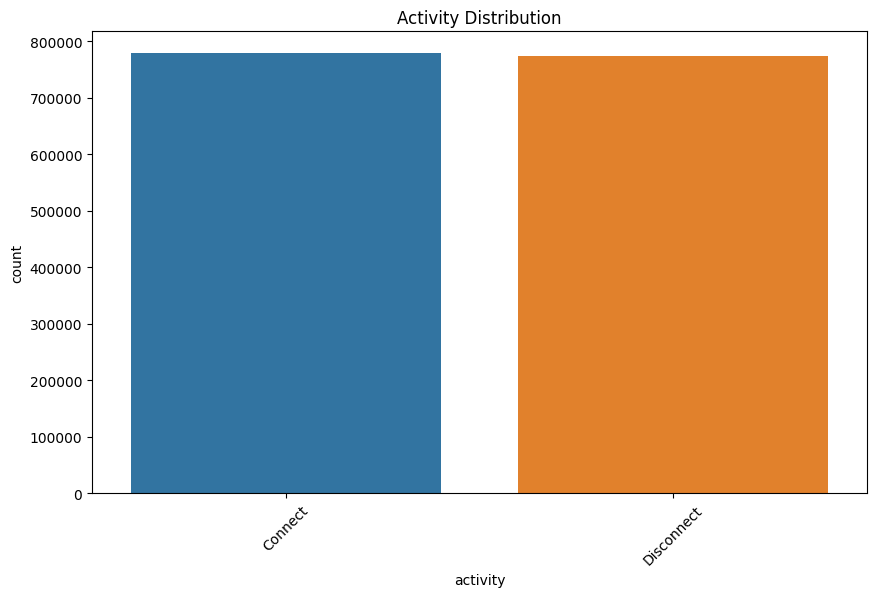

In [32]:
# Countplot of activities
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='activity', order=merged_df['activity'].value_counts().index)
plt.title('Activity Distribution')
plt.xticks(rotation=45)
plt.show()


### Activities Over Time

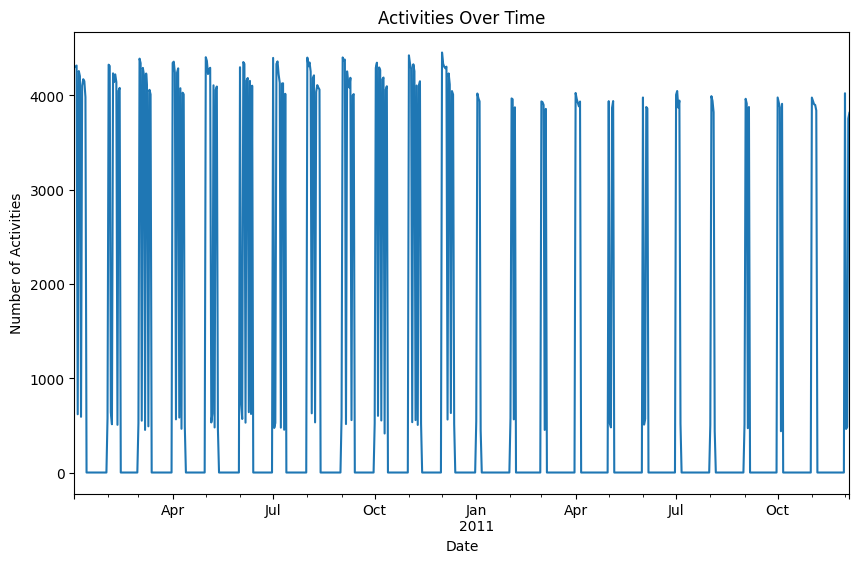

In [24]:
# Plot number of activities over time
merged_df.set_index('date', inplace=True)
activity_over_time = merged_df['activity'].resample('D').count()

plt.figure(figsize=(10, 6))
activity_over_time.plot()
plt.title('Activities Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Activities')
plt.show()

### Distribution of Activities by User

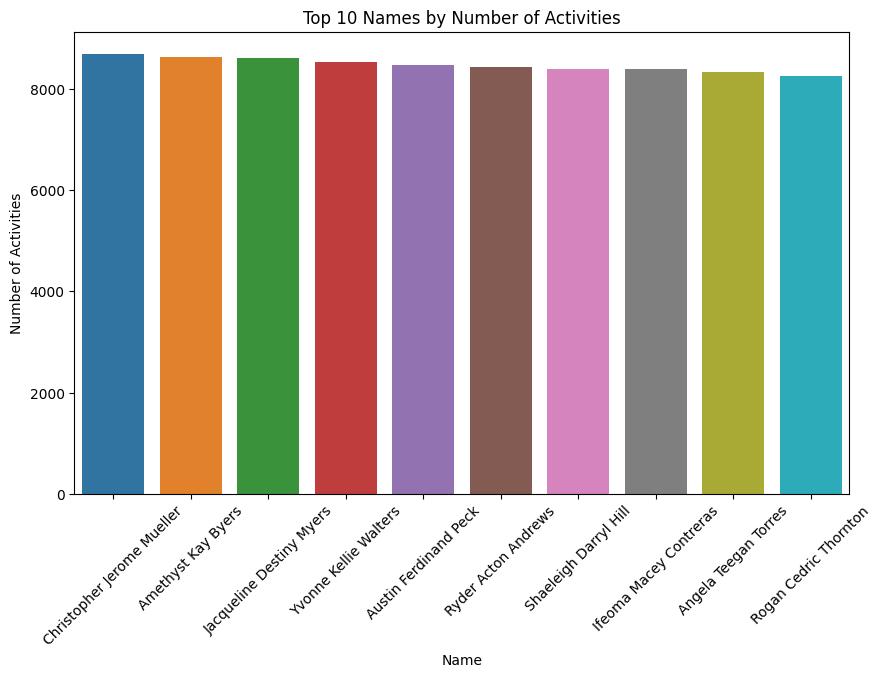

In [26]:
# Top names (instead of user_id) by number of activities
top_names = merged_df['employee_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_names.index, y=top_names.values)
plt.title('Top 10 Names by Number of Activities')
plt.xlabel('Name')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.show()

### Activities by Day of the Week

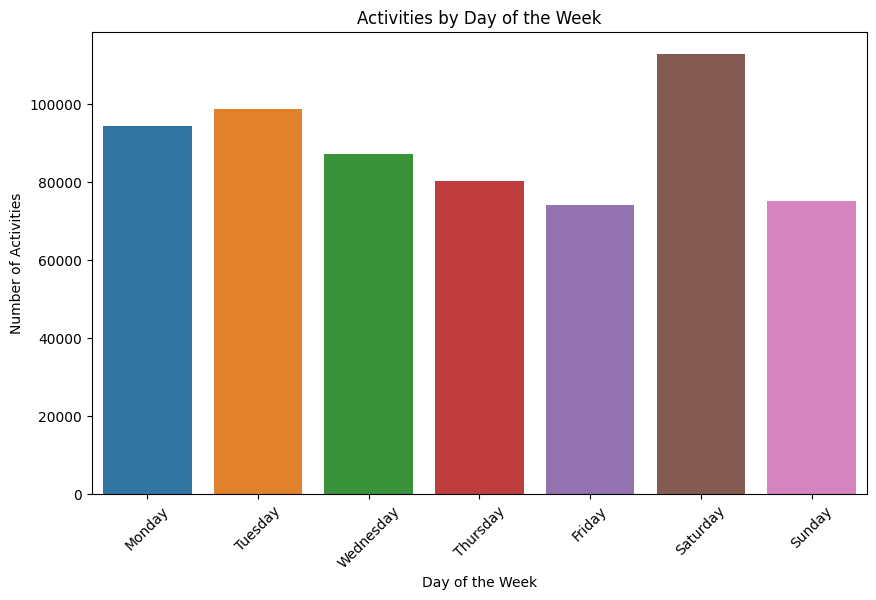

In [27]:
# Extract day of the week
merged_df['day_of_week'] = merged_df.index.day_name()

# Countplot of activities by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Activities by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.show()

### File Tree Analysis

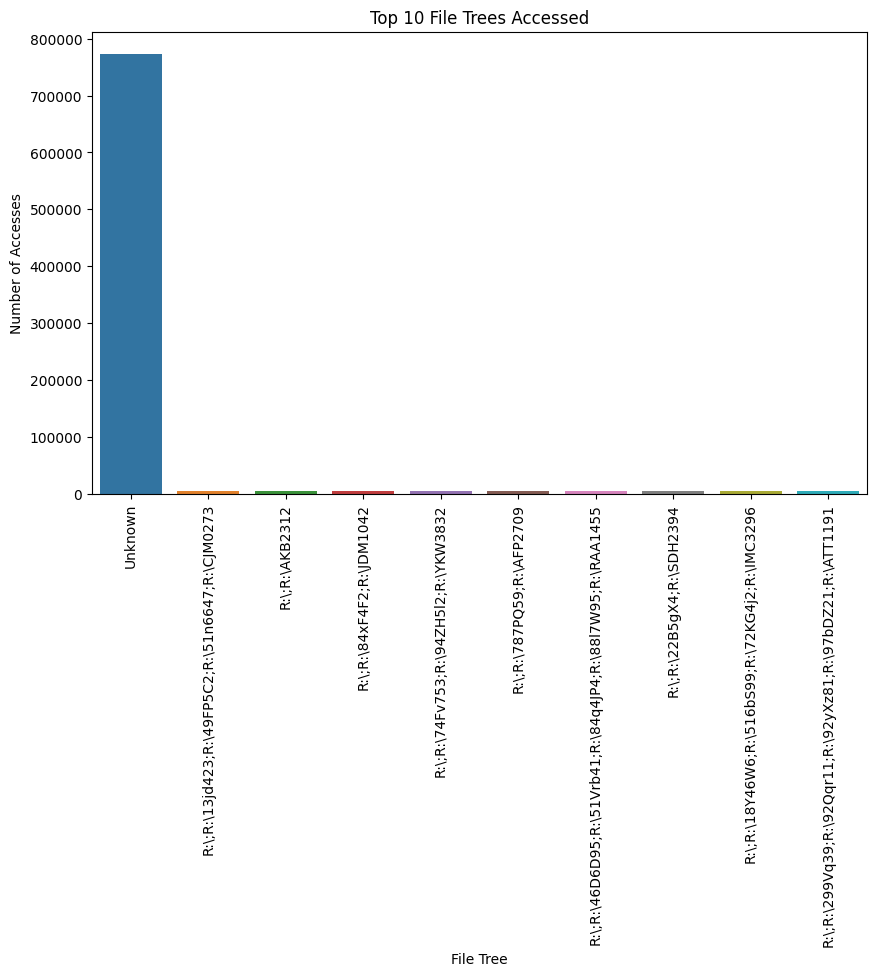

In [28]:
# Top file trees accessed
top_file_trees = merged_df['file_tree'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_file_trees.index, y=top_file_trees.values)
plt.title('Top 10 File Trees Accessed')
plt.xlabel('File Tree')
plt.ylabel('Number of Accesses')
plt.xticks(rotation=90)
plt.show()

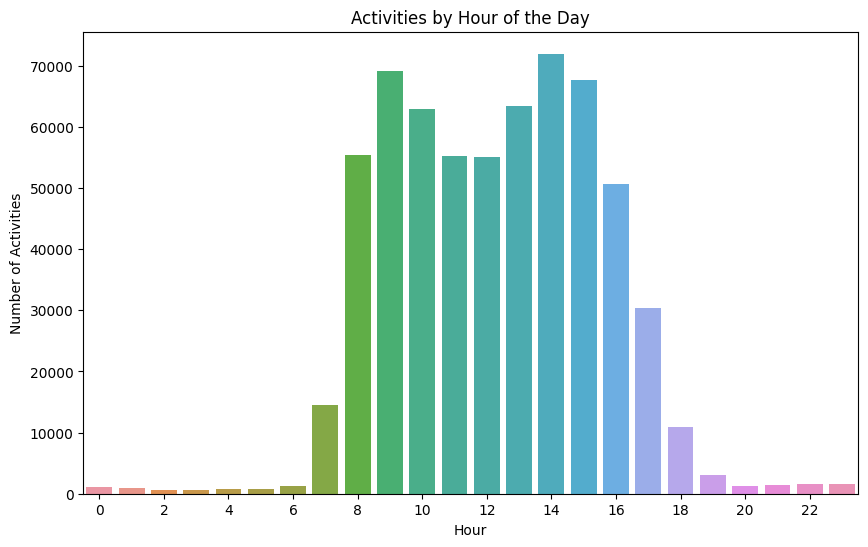

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='hour')
plt.title('Activities by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Activities')
plt.xticks(ticks=range(0, 24, 2), labels=range(0, 24, 2))  # Show every other hour
plt.show()
